<a href="https://colab.research.google.com/github/chathurapr/MDA-Programming/blob/master/GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a binary string. The population size is set to 4. We need to find the maximum value of x2 given that x = any number between 1 and 2n-1

In [277]:
import random
n = 20     #Number of dimensions
p = 15     #pupulation size
population = random.sample(range(1, 2**(n-12)), p)

print(population)
for i in range(0, len(population)):
  temp = bin(population[i])
  population[i] = temp[2:len(temp)].zfill(n)
print(population)


[116, 138, 94, 68, 109, 243, 160, 170, 201, 23, 187, 117, 106, 241, 136]
['00000000000001110100', '00000000000010001010', '00000000000001011110', '00000000000001000100', '00000000000001101101', '00000000000011110011', '00000000000010100000', '00000000000010101010', '00000000000011001001', '00000000000000010111', '00000000000010111011', '00000000000001110101', '00000000000001101010', '00000000000011110001', '00000000000010001000']


Now let's write a function to compute the fitness matrix of the population.

In [11]:
def CompFitness(p):
  fitMatrix = []
  fitTotal = 0
  for i in p:
    dicVal = []
    fVal = int(i,2)**2
    fitTotal += fVal
    dicVal.append(i)
    dicVal.append(fVal)
    fitMatrix.append(dicVal)

  for i in fitMatrix:
    i.append(i[1]/fitTotal)

  return fitMatrix

#fitMatrix = CompFitness(['11100', '00011', '10001', '00111'])

Now let's write a function to get two parents selected. We use roulette wheel method here.

In [17]:
def SelectParents(fm):
  parents = []
  
  while len(parents) != 2:
    num = random.random()
    margin = 0
    for i in range(0,len(fitMatrix)):
      margin += fitMatrix[i][2]
      if num <= margin:
        if len(parents) == 0:
          parents.append(fitMatrix[i][0])
        elif parents[0] != fitMatrix[i][0]:
          parents.append(fitMatrix[i][0])
        break
  return parents





['10001', '11100']


Now we will write a function to crossover

In [53]:
def Crossover(p):
  children = []
  cp = n//2   
  part1 = [p[0][0:cp],p[0][cp:len(p[0])]]
  part2 = [p[1][0:cp],p[1][cp:len(p[1])]]
  
  children.append(part1[0]+part2[1])
  children.append(part2[0]+part1[1])

  return children



Now we will write the mutation function

In [261]:
def Mutate(c):
  tempC = []
  for i in c:
    dec = random.random()
    if dec < 0.7:  #We mutate only with 40% chance
      mp = random.randrange(0,len(i))
      iLst = list(i)
      if iLst[mp] == '1':
        iLst[mp] = '0'
      else:
        iLst[mp] = '1'
      x = "".join(iLst)
      tempC.append(x)
    else:
      tempC.append(i)
    c = tempC
  return c
#c = ['10001', '11100']
#print(Mutate(c))

Now let's create the new generation.

In [279]:
myPopulation = population
newGenSize = 40 #Size of the new generation

I = 50          #Number of iterations
best = []
def myFunc(e):
  return e[1]

for x in range(0,I):
  newGen = []
  fitMatrix = CompFitness(myPopulation) #Make the fitness matrix of the initial population

  #Copy the parents into newGen list
  for i in fitMatrix:
    newGen.append(i[0:2])

  #Fill the rest with crossover
  while len(newGen) < newGenSize:
    #Select parents
    parents = SelectParents(fitMatrix)
    #Crossover and then mutate
    children = Mutate(Crossover(parents))

    #Compute the fitness of children and add to the newGen list
    for i in children:
      newMember = []
      newMember.append(i)
      newMember.append(int(i,2)**2)
      newGen.append(newMember)

  #Sort the newGen list according to fitness
  newGen.sort(reverse=True, key=myFunc)
  best.append([x+1, newGen[0][0], newGen[0][1]])
  #Make the new population by taking the best set

  newPopulation = []
  i = 0
  while len(newPopulation) < p:
    found = False
    for y in newPopulation:
      if newGen[i][0] == y:
        found = True
        break
    if found == False:
      newPopulation.append(newGen[i][0])
    i += 1

  myPopulation = newPopulation

print(newGen)
print(myPopulation)
print(best[len(best)-1])

[['11111111111111111111', 1099509530625], ['11111111111111111110', 1099507433476], ['11111111111111111110', 1099507433476], ['11111111111111111101', 1099505336329], ['11111111111111111101', 1099505336329], ['11111111111111111101', 1099505336329], ['11111111111111111100', 1099503239184], ['11111111111111111100', 1099503239184], ['11111111111111111011', 1099501142041], ['11111111111111111010', 1099499044900], ['11111111111111111010', 1099499044900], ['11111111111111111001', 1099496947761], ['11111111111111111001', 1099496947761], ['11111111111111111001', 1099496947761], ['11111111111111111000', 1099494850624], ['11111111111111110111', 1099492753489], ['11111111111111110111', 1099492753489], ['11111111111111110110', 1099490656356], ['11111111111111110110', 1099490656356], ['11111111111111110101', 1099488559225], ['11111111111111110101', 1099488559225], ['11111111111111110100', 1099486462096], ['11111111111111110100', 1099486462096], ['11111111111111110011', 1099484364969], ['1111111111111

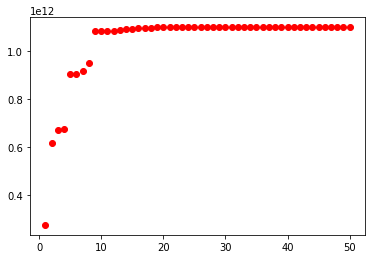

In [280]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(best)
x = df[0]
y = df[2]

plt.plot(x, y, 'o', color='red')